In [1]:
import pandas as pd

In [2]:
import pandas as pd
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import math
from sklearn.model_selection import train_test_split

%matplotlib inline

In [173]:
df = pd.read_csv("./orderInfoAge.csv")


In [174]:
df.head()

currentYear = 1998
def func(row):
    return currentYear - int(row['BirthDate'][0:4])


df['Age'] = df.apply(func, axis=1)
df.head()

df.columns

Index(['Unnamed: 0', 'CustomerID', 'AveMonthSpend', 'BikeBuyer', 'Title',
       'FirstName', 'MiddleName', 'LastName', 'Suffix', 'AddressLine1',
       'AddressLine2', 'City', 'StateProvinceName', 'CountryRegionName',
       'PostalCode', 'PhoneNumber', 'BirthDate', 'Education', 'Occupation',
       'Gender', 'MaritalStatus', 'HomeOwnerFlag', 'NumberCarsOwned',
       'NumberChildrenAtHome', 'TotalChildren', 'YearlyIncome', 'Age',
       'Children'],
      dtype='object')

In [175]:
df = pd.concat([df,pd.get_dummies(df['Gender'], prefix='Gender')],axis=1)
df.drop(['Gender'],axis=1, inplace=True)
df.head()
df = pd.concat([df,pd.get_dummies(df['MaritalStatus'], prefix='MaritalStatus')],axis=1)
df.drop(['MaritalStatus'],axis=1, inplace=True)
df.head()
#df = pd.concat([df,pd.get_dummies(df['Occupation'], prefix='Occupation')],axis=1)
#df.drop(['Occupation'],axis=1, inplace=True)
#df.head()
df = pd.concat([df,pd.get_dummies(df['Education'], prefix='Education')],axis=1)
df.drop(['Education'],axis=1, inplace=True)
df.head()
df.drop(['CustomerID'],axis=1, inplace=True)
df.drop(['TotalChildren'],axis=1, inplace=True)
#df = pd.concat([df,pd.get_dummies(df['BikeBuyer'], prefix='BikeBuyer')],axis=1)
#df.drop(['BikeBuyer'],axis=1, inplace=True)
#df.head()

In [176]:
df.dtypes

Unnamed: 0                        int64
AveMonthSpend                     int64
BikeBuyer                         int64
Title                            object
FirstName                        object
MiddleName                       object
LastName                         object
Suffix                           object
AddressLine1                     object
AddressLine2                     object
City                             object
StateProvinceName                object
CountryRegionName                object
PostalCode                       object
PhoneNumber                      object
BirthDate                        object
Occupation                       object
HomeOwnerFlag                     int64
NumberCarsOwned                   int64
NumberChildrenAtHome              int64
YearlyIncome                      int64
Age                               int64
Children                         object
Gender_F                          uint8
Gender_M                          uint8


In [177]:
model = df.select_dtypes(exclude=['object'])
model.drop(['Unnamed: 0'],axis=1, inplace=True)
model.drop(['BikeBuyer'],axis=1, inplace=True)
model.drop(['Gender_M'],axis=1, inplace=True)
model.drop(['MaritalStatus_M'],axis=1, inplace=True)
model.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,AveMonthSpend,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,YearlyIncome,Age,Gender_F,MaritalStatus_S,Education_Bachelors,Education_Graduate Degree,Education_High School,Education_Partial College,Education_Partial High School
0,89,1,0,0,137947,32,0,0,1,0,0,0,0
1,117,0,1,3,101141,33,0,1,1,0,0,0,0
2,123,1,1,3,91945,33,0,0,1,0,0,0,0
3,50,0,1,0,86688,30,1,1,1,0,0,0,0
4,95,1,4,5,92771,30,1,1,1,0,0,0,0


In [178]:
smallModel = model[['Age','MaritalStatus_S','NumberChildrenAtHome','YearlyIncome','Gender_F', 'AveMonthSpend']]

In [179]:
y = smallModel.pop('AveMonthSpend')
X = smallModel

In [180]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
x_train.head()
#x_test
#y_train

,Age,MaritalStatus_S,NumberChildrenAtHome,YearlyIncome,Gender_F
1864,31,1,0,78351,0
13915,18,1,0,65860,1
8910,55,0,0,86382,1
7015,44,1,0,95175,1
1145,45,1,0,88894,1


In [181]:
scaler = preprocessing.StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
print(x_train.shape)
x_train

(11530, 5)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


array([[-0.48979896,  1.08874593, -0.65769308,  0.01349042, -0.99480965],
       [-1.64225354,  1.08874593, -0.65769308, -0.30192883,  1.00521743],
       [ 1.63780949, -0.91848793, -0.65769308,  0.216287  ,  1.00521743],
       ...,
       [-0.0465472 ,  1.08874593,  1.30432534,  1.75275324,  1.00521743],
       [ 0.30805421, -0.91848793, -0.65769308,  0.76813812, -0.99480965],
       [ 1.10590738,  1.08874593,  2.61233762,  1.34152896,  1.00521743]])

In [195]:
## define and fit the linear regression model
lin_mod = linear_model.LinearRegression()
lin_mod.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [196]:
print(lin_mod.intercept_)
print(lin_mod.coef_)

72.44640069384215
[ -1.46208169  -3.22444043  16.92670097   7.93624111 -14.15466582]


In [197]:
def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    #print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
   
y_score = lin_mod.predict(x_test) 
print_metrics(y_test, y_score, 28)    

Mean Square Error      = 39.70064732151013
Root Mean Square Error = 6.300844968852204
Mean Absolute Error    = 4.84447342233743
R^2                    = 0.9454183669903693
Adjusted R^2           = 0.9451575805647349


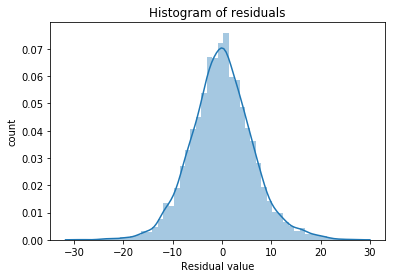

In [198]:
def hist_resids(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.values.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    sns.distplot(resids)
    plt.title('Histogram of residuals')
    plt.xlabel('Residual value')
    plt.ylabel('count')
    
hist_resids(y_test, y_score)    

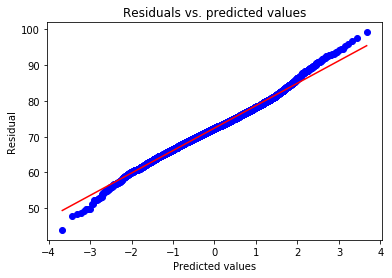

In [186]:
def resid_qq(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.values.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    ss.probplot(resids.flatten(), plot = plt)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')
    
resid_qq(y_test, y_score)

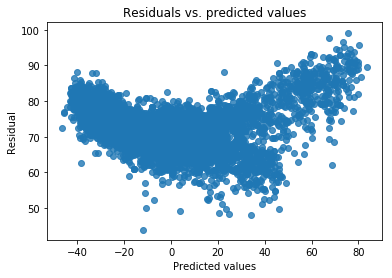

In [187]:
def resid_plot(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.values.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    sns.regplot(y_score, resids, fit_reg=False)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')

resid_plot(y_test, y_score)

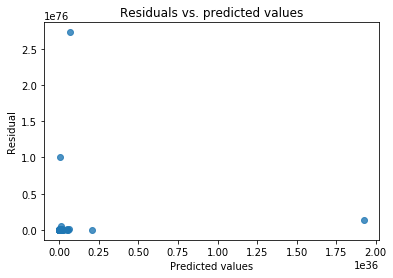

In [188]:
y_score_untransform = np.exp(y_score)
y_test_untransform = np.exp(y_test)
resid_plot(y_test_untransform, y_score_untransform)

# Apply to Test Data

In [189]:
dfTest = pd.read_csv("./AW_test.csv")

currentYear = 1998
def func(row):
    return currentYear - int(row['BirthDate'][0:4])


dfTest['Age'] = df.apply(func, axis=1)
dfTest.head()

dfTest = pd.concat([dfTest,pd.get_dummies(dfTest['Gender'], prefix='Gender')],axis=1)
dfTest.drop(['Gender'],axis=1, inplace=True)
dfTest.head()
dfTest = pd.concat([dfTest,pd.get_dummies(dfTest['MaritalStatus'], prefix='MaritalStatus')],axis=1)
dfTest.drop(['MaritalStatus'],axis=1, inplace=True)
dfTest.head()
#dfTest = pd.concat([dfTest,pd.get_dummies(dfTest['Occupation'], prefix='Occupation')],axis=1)
#dfTest.drop(['Occupation'],axis=1, inplace=True)
#dfTest.head()
dfTest = pd.concat([dfTest,pd.get_dummies(dfTest['Education'], prefix='Education')],axis=1)
dfTest.drop(['Education'],axis=1, inplace=True)
dfTest.head()
# Create Age Metrics
dfTest.drop(['CustomerID'],axis=1, inplace=True)

testModel = dfTest.select_dtypes(exclude=['object'])
#testmodel.drop(['Unnamed: 0'],axis=1, inplace=True)
#testModel.drop(['BikeBuyer'],axis=1, inplace=True)
testModel.drop(['Gender_M'],axis=1, inplace=True)
testModel.drop(['MaritalStatus_M'],axis=1, inplace=True)
testModel.drop(['TotalChildren'],axis=1, inplace=True)
testModel.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,YearlyIncome,Age,Gender_F,MaritalStatus_S,Education_Bachelors,Education_Graduate Degree,Education_High School,Education_Partial College,Education_Partial High School
0,0,2,0,86931,32,1,1,1,0,0,0,0
1,1,2,2,100125,33,0,0,1,0,0,0,0
2,1,2,0,103985,33,1,0,0,1,0,0,0
3,1,0,0,127161,30,0,0,0,1,0,0,0
4,1,1,2,21876,30,1,0,0,0,1,0,0


In [190]:
smallTest = testModel[['Age','MaritalStatus_S','NumberChildrenAtHome','YearlyIncome','Gender_F']]

In [191]:
#scaler = preprocessing.StandardScaler().fit(x_train)
#scaler = preprocessing.StandardScaler().fit(smallTest)
testModel = scaler.transform(smallTest)
#x_test = scaler.transform(x_test)
print(testModel.shape)
testModel

(500, 5)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


array([[-0.40114861,  1.08874593, -0.65769308,  0.23015019,  1.00521743],
       [-0.31249826, -0.91848793,  0.6503192 ,  0.5633214 , -0.99480965],
       [-0.31249826, -0.91848793, -0.65769308,  0.66079305,  1.00521743],
       ...,
       [-0.75575002,  1.08874593,  1.30432534,  1.52217977,  1.00521743],
       [-1.11035143, -0.91848793, -0.65769308,  0.59715871,  1.00521743],
       [-1.11035143,  1.08874593, -0.65769308, -1.48249731,  1.00521743]])

In [192]:
x_train

array([[-0.48979896,  1.08874593, -0.65769308,  0.01349042, -0.99480965],
       [-1.64225354,  1.08874593, -0.65769308, -0.30192883,  1.00521743],
       [ 1.63780949, -0.91848793, -0.65769308,  0.216287  ,  1.00521743],
       ...,
       [-0.0465472 ,  1.08874593,  1.30432534,  1.75275324,  1.00521743],
       [ 0.30805421, -0.91848793, -0.65769308,  0.76813812, -0.99480965],
       [ 1.10590738,  1.08874593,  2.61233762,  1.34152896,  1.00521743]])

In [200]:
import numpy
test_results = lin_mod.predict(testModel) 
numpy.savetxt("regResult.csv", test_results, delimiter=",")

# Begin Classification

In [22]:
model2 = df.select_dtypes(exclude=['object'])
model2.drop(['CustomerID'],axis=1, inplace=True)
model2.drop(['NumberCarsOwned'],axis=1, inplace=True)
model2.drop(['AveMonthSpend'],axis=1, inplace=True)
model2.drop(['Unnamed: 0'],axis=1, inplace=True)
model2.drop(['TotalChildren'],axis=1, inplace=True)
#model2.drop(['NumberChildrenAtHome'],axis=1, inplace=True)
#model2.drop(['Age_over55'],axis=1, inplace=True)
#model2.drop(['Age_under25'],axis=1, inplace=True)
#model2.drop(['Age_25to45'],axis=1, inplace=True)
#model2.drop(['MaritalStatus_S'],axis=1, inplace=True)
model2.drop(['Gender_F'],axis=1, inplace=True)
model2.drop(['YearlyIncome'],axis=1, inplace=True)
model2.drop(list(model2.filter(regex = 'Occupation')), axis = 1, inplace = True)
#model2.drop(list(model2.filter(regex = 'Education')), axis = 1, inplace = True)
#model2.drop(['Gender_M'],axis=1, inplace=True)
#model2.drop(['BikeBuyer'],axis=1, inplace=True)
model2.head()

,BikeBuyer,HomeOwnerFlag,NumberChildrenAtHome,Gender_M,MaritalStatus_M,MaritalStatus_S,Age_18,Age_19,Age_20,Age_21,...,Age_83,Age_85,Age_86,Age_87,Age_88,Education_Bachelors,Education_Graduate Degree,Education_High School,Education_Partial College,Education_Partial High School
0,0,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,0,3,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,1,3,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,1,5,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [523]:
y = model2.pop('BikeBuyer')
X = model2
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
x_train.head()
x_train.shape
#x_test
#y_train

(12046, 12)

In [497]:
scaler = preprocessing.StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
print(x_train.shape)
#x_train

(12046, 12)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [498]:
## define and fit the linear regression model
logistic_mod = linear_model.LogisticRegression()
logistic_mod.fit(x_train, y_train)
print(lin_mod.intercept_)
print(lin_mod.coef_)

0.0
[-1.72145072e-02 -3.42232180e-03  2.05637316e-01 -1.64549860e-02
  6.86285400e-02 -2.97587859e+12 -2.97587859e+12 -3.08841085e+13
 -3.08841085e+13 -2.05590374e+13 -2.06702004e+13 -1.86811358e+13
 -2.56219112e+13 -2.41579268e+13 -1.40331909e+13 -1.18184619e+13
 -1.09788090e+13]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [499]:
y_score

array([-0.27990731, -0.44556493,  0.20091945, ...,  0.19310695,
       -0.20337743, -0.00806493])

In [500]:
probabilities = logistic_mod.predict_proba(x_test)
print(probabilities[:15,:])

[[0.8989317  0.1010683 ]
 [0.98513415 0.01486585]
 [0.44097894 0.55902106]
 [0.89570874 0.10429126]
 [0.4939999  0.5060001 ]
 [0.28797849 0.71202151]
 [0.93080521 0.06919479]
 [0.49660775 0.50339225]
 [0.17889054 0.82110946]
 [0.22270551 0.77729449]
 [0.07647146 0.92352854]
 [0.94767456 0.05232544]
 [0.61500077 0.38499923]
 [0.89570874 0.10429126]
 [0.87237851 0.12762149]]


In [501]:
def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs[:,1]])
scores = score_model(probabilities, 0.5)
print(np.array(scores[:15]))
print(y_test[:15])

[0 0 1 0 1 1 0 1 1 1 1 0 0 0 0]
12273    0
2814     0
7068     1
2796     0
2884     1
635      0
6733     0
16875    1
1710     1
3865     1
2742     1
16754    0
450      1
16828    0
15474    0
Name: BikeBuyer, dtype: int64


In [502]:
def print_metrics(labels, scores):
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score positive    Score negative')
    print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy  %0.2f' % sklm.accuracy_score(labels, scores))
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])


    
print_metrics(y_test, scores)    

                 Confusion matrix
                 Score positive    Score negative
Actual positive      3107               365
Actual negative       690              1001

Accuracy  0.80
 
           Positive      Negative
Num case     3472          1691
Precision    0.82          0.73
Recall       0.89          0.59
F1           0.85          0.65


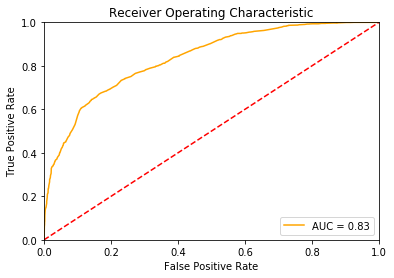

In [503]:
def plot_auc(labels, probs):
    ## Compute the false positive rate, true positive rate
    ## and threshold along with the AUC
    fpr, tpr, threshold = sklm.roc_curve(labels, probs[:,1])
    auc = sklm.auc(fpr, tpr)
    
    ## Plot the result
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, color = 'orange', label = 'AUC = %0.2f' % auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
plot_auc(y_test, probabilities)   

In [471]:
# Create a weighted model:
logistic_mod = linear_model.LogisticRegression(class_weight = {0:0.45, 1:0.55}) 
logistic_mod.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight={0: 0.45, 1: 0.55}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [472]:
probabilities = logistic_mod.predict_proba(x_test)
print(probabilities[:15,:])

[[0.91606867 0.08393133]
 [0.98859777 0.01140223]
 [0.26823214 0.73176786]
 [0.85495302 0.14504698]
 [0.38927594 0.61072406]
 [0.36248721 0.63751279]
 [0.86605843 0.13394157]
 [0.39538654 0.60461346]
 [0.16601445 0.83398555]
 [0.08376471 0.91623529]
 [0.11332047 0.88667953]
 [0.89250763 0.10749237]
 [0.54567505 0.45432495]
 [0.8408589  0.1591411 ]
 [0.80662569 0.19337431]]


                 Confusion matrix
                 Score positive    Score negative
Actual positive      3025               447
Actual negative       637              1054

Accuracy  0.79
 
           Positive      Negative
Num case     3472          1691
Precision    0.83          0.70
Recall       0.87          0.62
F1           0.85          0.66


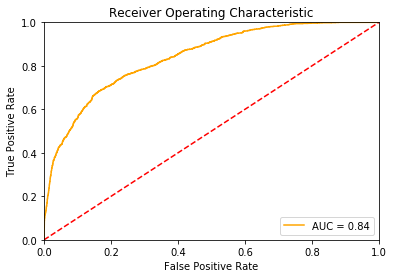

In [473]:
scores = score_model(probabilities, 0.5)
print_metrics(y_test, scores)  
plot_auc(y_test, probabilities)  

In [474]:
## More people don't buy, some might need better weighting. But, let's test the thresholds (Going down hurt our AUC)
def test_threshold(probs, labels, threshold):
    scores = score_model(probs, threshold)
    print('')
    print('For threshold = ' + str(threshold))
    print_metrics(labels, scores)

thresholds = [0.5, 0.55, 0.6, 0.65, 0.7]
for t in thresholds:
    test_threshold(probabilities, y_test, t)


For threshold = 0.5
                 Confusion matrix
                 Score positive    Score negative
Actual positive      3025               447
Actual negative       637              1054

Accuracy  0.79
 
           Positive      Negative
Num case     3472          1691
Precision    0.83          0.70
Recall       0.87          0.62
F1           0.85          0.66

For threshold = 0.55
                 Confusion matrix
                 Score positive    Score negative
Actual positive      3109               363
Actual negative       718               973

Accuracy  0.79
 
           Positive      Negative
Num case     3472          1691
Precision    0.81          0.73
Recall       0.90          0.58
F1           0.85          0.64

For threshold = 0.6
                 Confusion matrix
                 Score positive    Score negative
Actual positive      3194               278
Actual negative       825               866

Accuracy  0.79
 
           Positive      Negative
Num case

In [533]:
dfTest = pd.read_csv("./AW_test.csv")
# Create Age Metrics

currentYear = 1998
def func(row):
    if currentYear - int(row['BirthDate'][0:4]) <= 25:
        return 'under25'
    elif currentYear - int(row['BirthDate'][0:4]) <= 45:
        return '25to45' 
    else:
        return 'over55'

dfTest['Age'] = df.apply(func, axis=1)
dfTest.head()

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,...,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,Age
0,18988,NaN,Courtney,A,Baker,NaN,8727 Buena Vista Ave.,NaN,Fremont,California,...,Bachelors,Management,F,S,0,2,0,5,86931,25to45
1,29135,NaN,Adam,C,Allen,NaN,3491 Cook Street,NaN,Haney,British Columbia,...,Bachelors,Skilled Manual,M,M,1,2,2,4,100125,25to45
2,12156,NaN,Bonnie,NaN,Raji,NaN,359 Pleasant Hill Rd,NaN,Burbank,California,...,Graduate Degree,Management,F,M,1,2,0,4,103985,25to45
3,13749,NaN,Julio,C,Alonso,NaN,8945 Euclid Ave.,NaN,Burlingame,California,...,Graduate Degree,Skilled Manual,M,M,1,0,0,4,127161,25to45
4,27780,NaN,Christy,A,Andersen,NaN,"42, boulevard Tremblay",NaN,Dunkerque,Nord,...,High School,Manual,F,M,1,1,2,2,21876,25to45


In [534]:
# Perform onehot on dfTest
dfTest = pd.concat([dfTest,pd.get_dummies(dfTest['Gender'], prefix='Gender')],axis=1)
dfTest.drop(['Gender'],axis=1, inplace=True)
dfTest.head()
dfTest = pd.concat([dfTest,pd.get_dummies(dfTest['MaritalStatus'], prefix='MaritalStatus')],axis=1)
dfTest.drop(['MaritalStatus'],axis=1, inplace=True)
dfTest.head()
dfTest = pd.concat([dfTest,pd.get_dummies(dfTest['Occupation'], prefix='Occupation')],axis=1)
dfTest.drop(['Occupation'],axis=1, inplace=True)
dfTest.head()
dfTest = pd.concat([dfTest,pd.get_dummies(dfTest['Age'], prefix='Age')],axis=1)
dfTest.drop(['Age'],axis=1, inplace=True)
dfTest.head()
dfTest = pd.concat([dfTest,pd.get_dummies(dfTest['Education'], prefix='Education')],axis=1)
dfTest.drop(['Education'],axis=1, inplace=True)
dfTest.head()

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,...,Occupation_Professional,Occupation_Skilled Manual,Age_25to45,Age_over55,Age_under25,Education_Bachelors,Education_Graduate Degree,Education_High School,Education_Partial College,Education_Partial High School
0,18988,NaN,Courtney,A,Baker,NaN,8727 Buena Vista Ave.,NaN,Fremont,California,...,0,0,1,0,0,1,0,0,0,0
1,29135,NaN,Adam,C,Allen,NaN,3491 Cook Street,NaN,Haney,British Columbia,...,0,1,1,0,0,1,0,0,0,0
2,12156,NaN,Bonnie,NaN,Raji,NaN,359 Pleasant Hill Rd,NaN,Burbank,California,...,0,0,1,0,0,0,1,0,0,0
3,13749,NaN,Julio,C,Alonso,NaN,8945 Euclid Ave.,NaN,Burlingame,California,...,0,1,1,0,0,0,1,0,0,0
4,27780,NaN,Christy,A,Andersen,NaN,"42, boulevard Tremblay",NaN,Dunkerque,Nord,...,0,0,1,0,0,0,0,1,0,0


In [535]:
# Set up our test data for scoring
ztest = dfTest.select_dtypes(exclude=['object'])
ztest.drop(['CustomerID'],axis=1, inplace=True)
ztest.drop(['NumberCarsOwned'],axis=1, inplace=True)
#ztest.drop(['AveMonthSpend'],axis=1, inplace=True)
#ztest.drop(['Unnamed: 0'],axis=1, inplace=True)
ztest.drop(['TotalChildren'],axis=1, inplace=True)
#model2.drop(['NumberChildrenAtHome'],axis=1, inplace=True)
#model2.drop(['Age_over55'],axis=1, inplace=True)
ztest.drop(['Age_under25'],axis=1, inplace=True)
#model2.drop(['Age_25to45'],axis=1, inplace=True)
#model2.drop(['MaritalStatus_S'],axis=1, inplace=True)
ztest.drop(['Gender_F'],axis=1, inplace=True)
ztest.drop(['YearlyIncome'],axis=1, inplace=True)
ztest.drop(list(ztest.filter(regex = 'Occupation')), axis = 1, inplace = True)
#model2.drop(list(model2.filter(regex = 'Education')), axis = 1, inplace = True)
#model2.drop(['Gender_M'],axis=1, inplace=True)
#model2.drop(['BikeBuyer'],axis=1, inplace=True)
ztest.head()
ztest.shape

(500, 12)

In [538]:
probabilities = logistic_mod.predict_proba(ztest)
print(probabilities[:15,:])

[[0.5528555  0.4471445 ]
 [0.12716245 0.87283755]
 [0.71592197 0.28407803]
 [0.62798065 0.37201935]
 [0.21652468 0.78347532]
 [0.73337811 0.26662189]
 [0.06545955 0.93454045]
 [0.01272909 0.98727091]
 [0.00845997 0.99154003]
 [0.42234849 0.57765151]
 [0.30874605 0.69125395]
 [0.73337811 0.26662189]
 [0.67655329 0.32344671]
 [0.75744742 0.24255258]
 [0.56942153 0.43057847]]


In [546]:
def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs[:,1]])
scores = score_model(probabilities, 0.5)
print(np.array(scores))
np.savetxt("foo.csv", scores, delimiter=",")
#print(ztest[:15])

[0 1 0 0 1 0 1 1 1 1 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 1 1
 1 0 1 0 1 0 0 0 0 1 1 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1 1 1 1 1 1 0 1 1 0 1 0
 0 1 1 1 0 0 1 1 0 1 1 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1
 0 1 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0
 0 0 1 0 0 0 1 0 0 0 0 1 0 1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0
 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 1 0 0
 1 1 0 0 0 1 1 1 1 0 0 0 1 0 1 1 0 0 1 1 0 1 1 0 0 0 1 1 1 0 1 0 1 1 0 0 1
 0 0 0 1 1 1 1 0 1 1 0 1 0 0 1 1 0 1 0 1 0 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1
 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1
 1 1 1 1 0 1 0 0 0 1 1 0 0 1 0 1 1 0 1 0 1 0 0 1 1 0 0 1 0 0 1 0 1 0 0 0 1
 1 0 1 1 1 0 1 0 0 1 1 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 1 0 1
 0 0 0 1 0 0 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 1 0 1 0 1
 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1
 0 1 1 0 0 1 0 1 1 1 1 1 

In [540]:
scores = score_model(probabilities, 0.5)
print_metrics(y_test, scores)  
plot_auc(y_test, probabilities)  

ValueError: Found input variables with inconsistent numbers of samples: [5163, 500]